In [679]:
import numpy as np, pandas as pd, math
import matplotlib.pyplot as plt

## 3.3

In [475]:
data3 = pd.read_csv('./data3.csv')
data3_alpha = data3.get(['密度', '含糖率', '好瓜'])
data3_alpha['好瓜'] = data3_alpha['好瓜'].apply(lambda x: 1 if x == '是' else 0)
data3_alpha.head()

feature, label = data3_alpha.get(['密度', '含糖率']), data3_alpha['好瓜']
feature, label = feature.values, label.values
feature = np.c_[feature, np.ones(len(feature))]

/home/impulse/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [680]:
def deriv(feature, label, beta, lamda = 0.1):
    m = feature.shape[1]
    ret = np.zeros(m)
    for i in range(len(feature)):
        y = np.exp(np.dot(beta, feature[i]))
        p1 = float(y) / float(1 + y)
        ret -= feature[i] * (label[i] - p1)
    ret += 2 * lamda * beta ## l2 正则
    return ret

In [753]:
def LR(feature, label, beta = np.ones(3), step = 1.0, output = 0):
    m, i = feature.shape[1], 0
    beta, last = np.ones(m), np.zeros(m)
    while np.sum(np.square(last - beta)) > 1e-3:
        i = i + 1
        if output and (i < 10 or i % 100 == 0):
            print (i, beta)
        last = beta
        beta = beta - deriv(feature, label, beta) * step / i
    return beta

In [488]:
def plotBestFit(beta, feature, label):
    xcord1, ycord1 = [],  []
    xcord2, ycord2 = [],  []
    for i in range(len(feature)):
        if int(label[i]) == 1:
            xcord1.append(feature[i, 0]); ycord1.append(feature[i, 1])
        else:
            xcord2.append(feature[i, 0]); ycord2.append(feature[i, 1])
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(xcord1, ycord1, s = 30, c = 'red', marker='s')
    ax.scatter(xcord2, ycord2, s = 30, c = 'green')
    x = np.arange(0, 1, 0.1)
    y = (-beta[2] - beta[0] * x) / beta[1] ## w1*x1 + w2*x2 + b = 0
    ax.plot(x, y)
    plt.xlabel("X1"); plt.ylabel("X2")
    plt.show()

1 [1. 1. 1.]
2 [-2.36583886 -0.0786374  -5.63813213]
3 [ 0.16149194  1.04237363 -1.08342131]
4 [ 0.71717524  1.31707326 -0.13477098]
5 [ 0.38493164  1.22124462 -0.79518667]
6 [ 0.51726495  1.30058465 -0.58690538]
7 [ 0.51057822  1.31889727 -0.62622893]
8 [ 0.5176024   1.3389292  -0.63536156]
9 [ 0.52375376  1.35592766 -0.64253571]
10 [ 0.52905023  1.37057032 -0.64862601]
11 [ 0.5336645   1.38337873 -0.65392395]
12 [ 0.53773456  1.394727   -0.65860246]
13 [ 0.54136357  1.404889   -0.66278146]
14 [ 0.54462923  1.41407034 -0.66654923]
[ 0.54759114  1.4224289  -0.66997297]
1 0.3660153545401665
1 0.2886958446383729
1 0.05272104714657688
1 0.11529483825432735
1 -0.05969007841891716
1 -0.11217808755543618
1 -0.19463972193192391
1 -0.13054314017958074
0 -0.17583623675450902
0 -0.15711980346281545
0 -0.4547346911587755
0 -0.3413287450450886
0 -0.0910511743158322
0 -0.02856466424955484
0 0.05345853757366248
0 -0.28550940659975427
0 -0.12974475926364043


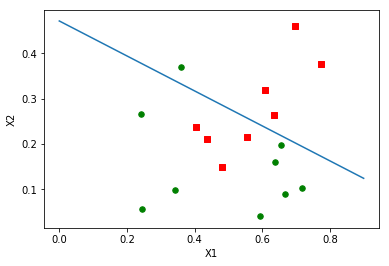

In [682]:
beta = LR(feature, label)

print (beta)

for i in range(len(feature)):
    print(label[i], np.dot(beta, feature[i]))
    
plotBestFit(beta, feature, label)

## 3.4

In [683]:
data_iris = pd.read_csv('./data_iris.csv', names=['sepal_l', 'sepal_w', 'petal_l', 'petal_w', 'type'])

In [684]:
def idxing(x):
    if x == 'Iris-setosa':
        return 0
    elif x == 'Iris-versicolor':
        return 1
    else:
        return 2
data_iris['type'] = data_iris['type'].apply(idxing)

In [687]:
def data_from_idx(data, idx):
    data = data[data['type'] != (idx + 2) % 3]
    data['type'] = data['type'].apply(lambda x: 0 if x == idx else 1)    
    return data

In [755]:
def ten_fold(df):
    
    fold = 10
    data = data_from_idx(df, 0)
    data = data.values
    
    correct_num = 0

    for T in range(10):
        np.random.shuffle(data)

        feature = data[:,:-1]
        label = data[:,-1]
        feature = np.c_[feature, np.ones(len(data))]

        for i in range(fold):
            index_test = np.arange(i, len(data), fold)
            index_train = np.array(list(set(range(100)).difference(index_test)))

            feature_train = feature[index_train]
            label_train = label[index_train]

            feature_test = feature[index_test]
            label_test = label[index_test]
            predict_label_test = np.zeros(len(label_test))

            beta = LR(feature_train, label_train)
            for i in range(len(label_test)):
                t = 1 if np.dot(beta, feature_test[i]) >= 0 else 0
                predict_label_test[i] = t

#             print(predict_label_test)
#             print(label_test)
            correct_num += np.sum(predict_label_test == label_test)
    
    print ('accuracy is {}%'.format(correct_num / float(10)))
    
    return 

In [756]:
ten_fold(data_iris)

/home/impulse/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


accuracy is 89.8%


In [764]:
def n_fold(df):
    
    data = data_from_idx(df, 0)
    data = data.values
    fold = len(data)
    
    correct_num = 0

    np.random.shuffle(data)

    feature = data[:,:-1]
    label = data[:,-1]
    feature = np.c_[feature, np.ones(len(data))]

    for i in range(fold):
        print ('i = {}'.format(i))
        index_test = np.arange(i, len(data), fold)
        index_train = np.array(list(set(range(100)).difference(index_test)))

        feature_train = feature[index_train]
        label_train = label[index_train]

        feature_test = feature[index_test]
        label_test = label[index_test]
        predict_label_test = np.zeros(len(label_test))

        beta = LR(feature_train, label_train)
        for i in range(len(label_test)):
            t = 1 if np.dot(beta, feature_test[i]) >= 0 else 0
            predict_label_test[i] = t

#             print(predict_label_test)
#             print(label_test)
        correct_num += np.sum(predict_label_test == label_test)
    
    print ('accuracy is {}%'.format(correct_num))
    
    return 

In [765]:
n_fold(data_iris)

/home/impulse/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


i = 0
i = 1
i = 2
i = 3
i = 4
i = 5
i = 6
i = 7
i = 8
i = 9
i = 10
i = 11
i = 12
i = 13
i = 14
i = 15
i = 16
i = 17
i = 18
i = 19
i = 20
i = 21
i = 22
i = 23
i = 24
i = 25
i = 26
i = 27
i = 28
i = 29
i = 30
i = 31
i = 32
i = 33
i = 34
i = 35
i = 36
i = 37
i = 38
i = 39
i = 40
i = 41
i = 42
i = 43
i = 44
i = 45
i = 46
i = 47
i = 48
i = 49
i = 50
i = 51
i = 52
i = 53
i = 54
i = 55
i = 56
i = 57
i = 58
i = 59
i = 60
i = 61
i = 62
i = 63
i = 64
i = 65
i = 66
i = 67
i = 68
i = 69
i = 70
i = 71
i = 72
i = 73
i = 74
i = 75
i = 76
i = 77
i = 78
i = 79
i = 80
i = 81
i = 82
i = 83
i = 84
i = 85
i = 86
i = 87
i = 88
i = 89
i = 90
i = 91
i = 92
i = 93
i = 94
i = 95
i = 96
i = 97
i = 98
i = 99
accuracy is 100%


## 3.5

In [883]:
data3 = pd.read_csv('./data3.csv')
data3_alpha = data3.get(['密度', '含糖率', '好瓜'])
data3_alpha['好瓜'] = data3_alpha['好瓜'].apply(lambda x: 1 if x == '是' else 0)
data3_alpha.head()

feature, label = data3_alpha.get(['密度', '含糖率']), data3_alpha['好瓜']
feature, label = feature.values, label.values

/home/impulse/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [802]:
def Devi(data): # 样本离差阵
    bar = np.mean(data)
    data -= bar
    return np.dot(data.T, data)

In [916]:
def LDA(feature, label):
    feature_1 = feature[label == 1]
    feature_0 = feature[label == 0]
    
    bar_1 = np.apply_along_axis(arr=feature_1, axis=0, func1d=np.mean)
    bar_0 = np.apply_along_axis(arr=feature_0, axis=0, func1d=np.mean)
#     Sb = np.dot(bar_0, bar_1.T)
    S0, S1 = Devi(feature_0), Devi(feature_1)
    Sw = S0 + S1
    U, S, VT = np.linalg.svd(Sw)
    
    end = 0
    for i in range(len(S) + 1):
        if S[:end].sum() / float(S.sum()) <= 0.99:
            end = i
            
    w = np.linalg.multi_dot([VT.T[:,:end], np.linalg.inv(np.diag(S[:end])), U[:end,:], bar_0 - bar_1])
    return w

In [917]:
w = LDA(feature, label)

In [918]:
def plotDisCriminant(w, feature, label):
    xcord1, ycord1 = feature[label == 0, 0], feature[label == 0, 1]
    xcord2, ycord2 = feature[label == 1, 0], feature[label == 1, 1]
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(xcord1, ycord1, s = 30, c = 'red', marker='s')
    ax.scatter(xcord2, ycord2, s = 30, c = 'green')
    x = np.arange(0, 1, 0.1)
    y = 1.0 * w[1] / w[0] * x
    ax.plot(x, y)
    plt.xlabel("X1"); plt.ylabel("X2")
    plt.show()

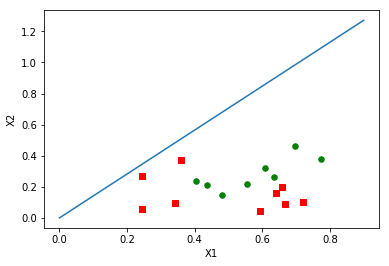

In [919]:
plotDisCriminant(w, feature, label)